# Network Dynamics: Node Centrality - Lab

## Introduction

In this lab, you'll get a chance to practice implementing and interpreting the centrality metrics discussed in the previous lesson by investigating the social network from Game of Thrones!

## Objectives
You will be able to: 
- Compare and calculate degree, closeness, betweenness, and eigenvector centrality measures
- Interpret characteristics of certain nodes based on their centrality metrics  

## Character Interaction Graph Data

A. J. Beveridge and J. Shan created a network from George R. Martin's "A song of ice and fire" by extracting relationships between characters of the story. [The dataset is available at Github](https://github.com/mathbeveridge/asoiaf). Relationships between characters were formed every time a character's name appears within 15 words of another character. This was designed as an approximate metric for character's interactions with each other. The results of this simple analysis are quite profound and produce interesting visuals such as this graph:

<img src="images/got.png" width=800>

With that, it's your turn to start investigating the most central characters!

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

##  Load the dataset 

Start by loading the dataset as a pandas DataFrame. From this, you'll then create a network representation of the dataset using NetworkX. 

The dataset is stored in the file `'asoiaf-all-edges.csv'`.

In [3]:
# Load edges into dataframes
df = pd.read_csv('asoiaf-all-edges.csv')
df.head()

# Print the first five rows


,Source,Target,Type,id,weight
0,Addam-Marbrand,Brynden-Tully,Undirected,0,3
1,Addam-Marbrand,Cersei-Lannister,Undirected,1,3
2,Addam-Marbrand,Gyles-Rosby,Undirected,2,3
3,Addam-Marbrand,Jaime-Lannister,Undirected,3,14
4,Addam-Marbrand,Jalabhar-Xho,Undirected,4,3


## Create a Graph

- Instantiate an empty graph 
- Iterate through the data and create appropriate edges to the empty graph you instantiated above. Be sure to add the weight to each edge 

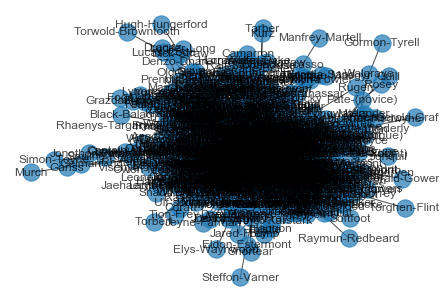

In [8]:
# Create an empty graph instance
G = nx.Graph()


# Read edge lists into dataframes
for index, row in df.iterrows():
    G.add_edge(row['Source'],row['Target'], weight=row['weight'])
nx.draw(G, with_labels=True, alpha=0.7)

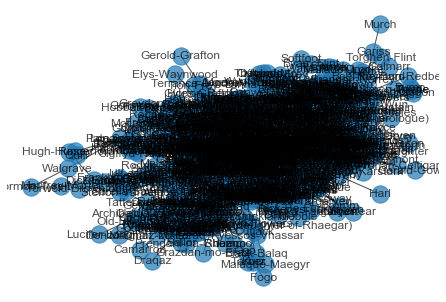

In [9]:
G2 = nx.from_pandas_edgelist(df, source='Source', target='Target')
nx.draw(G2, with_labels=True, alpha=0.7)

## Calculate Degree

To start the investigation of the most central characters in the books, calculate the degree centrality for each character. Then create a bar graph of the top 10 characters according to degree centrality.

In [12]:
import cufflinks as cf
cf.go_offline()

In [13]:
# Your code here
df_deg = pd.DataFrame(G.degree(), columns=["Node","Degree"]).sort_values("Degree",
                                                                        ascending=False)
df_deg.set_index('Node').head(10).iplot(kind='bar')

Addam-Marbrand      0.052658
Brynden-Tully       0.060019
Cersei-Lannister    0.235771
Gyles-Rosby         0.059528
Jaime-Lannister     0.226339
                      ...   
Talbert-Serry       0.000329
Willow-Witch-eye    0.003586
Thistle             0.000251
Tion-Frey           0.000310
Wulfe               0.000329
Name: eigenvector, Length: 796, dtype: float64

## Closeness Centrality

Repeat the above exercise for the top 10 characters according to closeness centrality.

In [14]:
closeness = pd.Series(nx.closeness_centrality(G), name='closeness')
closeness.sort_values(ascending=False).head(10).iplot(kind='bar')

## Betweeness Centrality

Repeat the process one more time for betweeness centrality.

In [15]:
# Your code here
betweenness = pd.Series(nx.betweenness_centrality(G), name='betweenness')
betweenness.sort_values(ascending=False).head(10).iplot(kind='bar')

## Putting it All Together

Great! Now put all of these metrics together along with eigenvector centrality. Combine all four metrics into a single dataframe for each character.

In [16]:
# Your code here
# Your code here
eigen = pd.Series(nx.eigenvector_centrality(G),name='eigenvector')
eigen.sort_values(ascending=False).head(10).iplot(kind='bar')


In [20]:
closeness.index

Index(['Addam-Marbrand', 'Brynden-Tully', 'Cersei-Lannister', 'Gyles-Rosby',
       'Jaime-Lannister', 'Jalabhar-Xho', 'Joffrey-Baratheon',
       'Kevan-Lannister', 'Lyle-Crakehall', 'Oberyn-Martell',
       ...
       'Shrouded-Lord', 'Simon-Toyne', 'Theomore', 'William-Foxglove',
       'Werlag', 'Talbert-Serry', 'Willow-Witch-eye', 'Thistle', 'Tion-Frey',
       'Wulfe'],
      dtype='object', length=796)

In [27]:
# df_list = [df_.index="Node",inplace=True)  for df_ in [df_deg,closeness, betweenness, eigen]]
df_deg = df_deg.set_index("Node")


KeyError: "None of ['Node'] are in the columns"

In [28]:
df_all = pd.concat([df_deg,closeness, betweenness, eigen],axis=1)
df_all

,Degree,closeness,betweenness,eigenvector
Addam-Marbrand,12,0.345803,4.696817e-04,0.052658
Aegon-Frey-(son-of-Stevron),4,0.313609,0.000000e+00,0.014688
Aegon-I-Targaryen,9,0.361692,6.891002e-03,0.025584
Aegon-Targaryen-(son-of-Rhaegar),15,0.342230,6.012167e-03,0.024691
Aegon-V-Targaryen,1,0.262636,0.000000e+00,0.001226
...,...,...,...,...
Yorko-Terys,1,0.301479,0.000000e+00,0.006041
Ysilla,6,0.324225,0.000000e+00,0.011529
Yurkhaz-zo-Yunzak,1,0.277197,0.000000e+00,0.002206
Zei,1,0.308259,0.000000e+00,0.005047


## Identifying Key Players

While centrality can tell us a lot, you've also begun to see how certain individuals may not be the most central characters, but can be pivotal in the flow of information from one community to another. In the previous lesson, such nodes were labeled as 'bridges' acting as the intermediaries between two clusters. Try and identify such characters from this dataset.

In [29]:
# Your code here
df_all['bridge'] = df_all['betweenness'] / df_all['Degree']
df_all.sort_values('bridge', ascending=False).head(10)

,Degree,closeness,betweenness,eigenvector,bridge
Aggar,4,0.269036,0.007997,0.001665,0.001999
Alleras,8,0.272915,0.014199,0.002928,0.001775
Theon-Greyjoy,66,0.423323,0.111283,0.102481,0.001686
Jon-Snow,114,0.445378,0.192120,0.144211,0.001685
Cutjack,3,0.255135,0.005028,0.001404,0.001676
Red-Oarsman,3,0.261255,0.005025,0.001042,0.001675
Daenerys-Targaryen,73,0.383317,0.118418,0.063043,0.001622
Victarion-Greyjoy,24,0.333753,0.036451,0.009395,0.001519
Pate-(novice),7,0.215097,0.010042,0.000175,0.001435
Tyrion-Lannister,122,0.476333,0.162191,0.251558,0.001329


## Drawing the Graph

To visualize all of these relationships, draw a graph of the network.

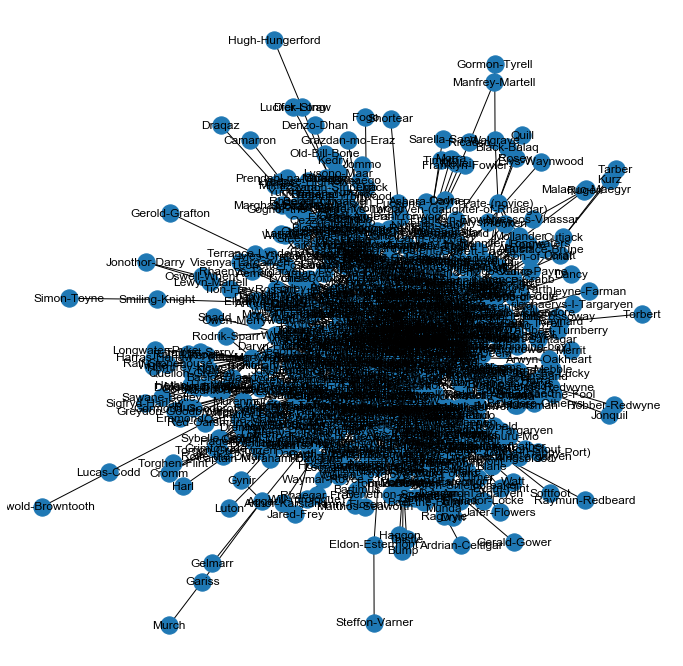

In [30]:
# Your code here
fig,ax= plt.subplots(figsize=(12,12))
nx.draw(G,with_labels=True,ax=ax)

## Subsetting the Graph

As you can see, the above graph is undoubtedly noisy, making it difficult to discern any useful patterns. As such, reset the graph and only add edges whose weight is 75 or greater. From there, redraw the graph. To further help with the display, try using `nx.spring_layout(G)` for the position. To jazz it up, try and recolor those nodes which you identified as bridge or bottleneck nodes to communication.

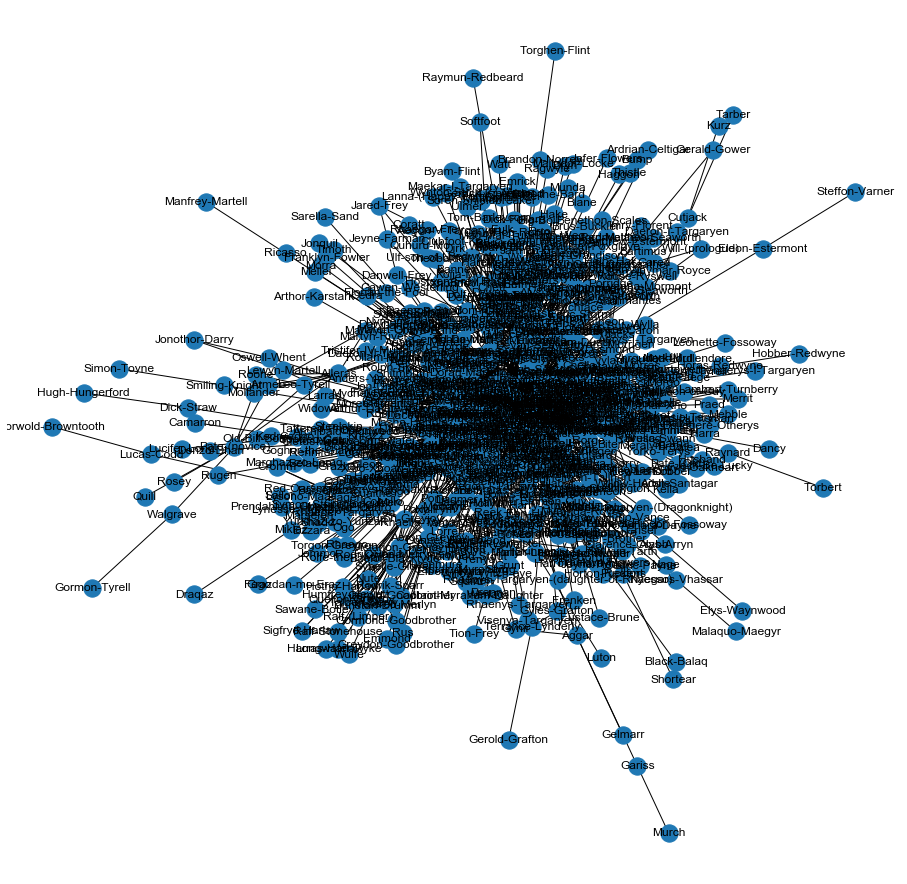

In [33]:
# Your code here
# Your code here
fig,ax= plt.subplots(figsize=(16,16))
nx.draw(G,with_labels=True,pos=nx.spring_layout(G),
        edge_labels=nx.get_edge_attributes(G,'weight'),ax=ax)

## Summary 

In this lab, we looked at different centrality measures of the graph data for the ASIOF dataset. We also compared these measures to see how they correlate with each other. We also saw in practice, the difference between taking the weighted centrality measures and how it may effect the results. 

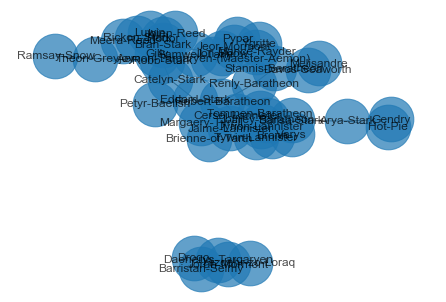

In [39]:
df_graph = df[df['weight']>75]
G=nx.Graph()
df_graph.apply(lambda row: G.add_edge(row['Source'],row['Target'],weight=row['weight']),
               axis=1)
nx.draw(G,with_labels=True,node_size=2000,alpha=0.7)

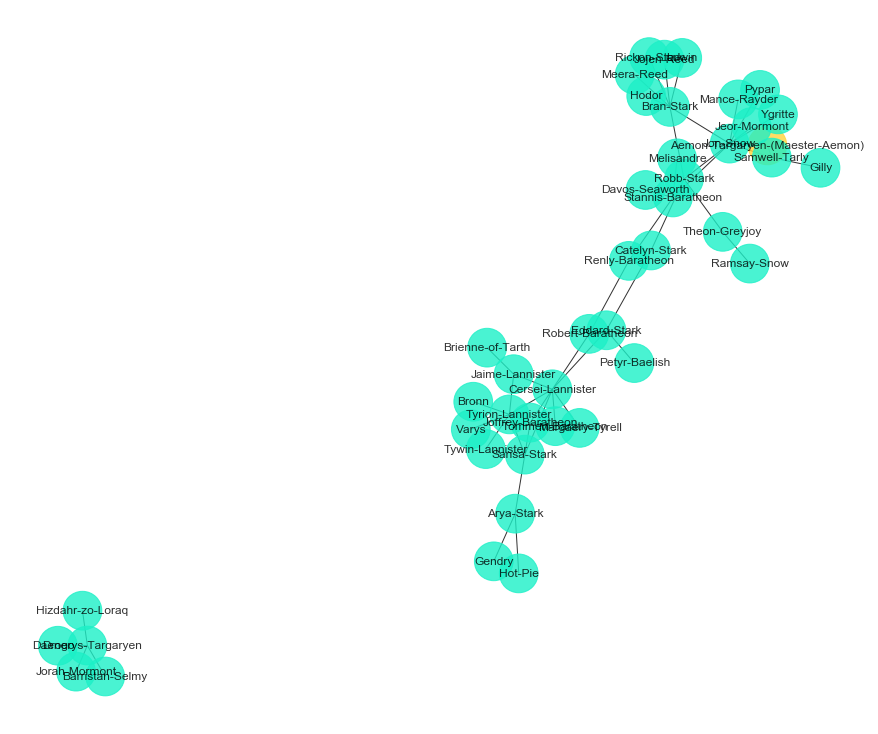

In [40]:
edge_labels = labels = nx.get_edge_attributes(G,'weight')
colors=[]
for node in G.nodes:
    if node in df_all.index[:10]:
        colors.append('#ffd43d')
    else:
        colors.append('#1cf0c7')

plt.figure(figsize=(12,10))
nx.draw(G, with_labels=True, pos=nx.spring_layout(G),
        edge_labels=edge_labels, alpha=.8, node_color=colors, node_size=1500);